# Capstone Project EDA

# Step 1: Get some data

In [2]:
import pandas as pd,  numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

%matplotlib inline

## 2. Check it out -- briefly
- Ensure types
- Scope for cleaning

In [3]:
df = pd.read_csv("./data/train.csv")
df.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [4]:
# The dataset is heavily unablanced, with %93.813 of data being non-toxic questions
df.groupby('target').size() / df.shape[0]

target
0    0.93813
1    0.06187
dtype: float64

In [5]:
df.shape

(1306122, 3)

## 3. EDA + Pre-processing
- Which strategies should we use?
  - Stopwords
    - Remove airline names

In [6]:
custom_stopwords = list(ENGLISH_STOP_WORDS)
#custom_stopwords += [
#    'united', 'usairways', 'southwest', 'southwestair', 'americanair', 'jetblue'
#]

In [7]:
vect = CountVectorizer(stop_words=custom_stopwords, ngram_range=(2, 2))

This dataset consistently crashes my computer. Now I'm going to cut it down so that it's a bite-sized piece that's not far off from the shape of the 1.3 million questions. I'm choosing 300,000 simply because it's a reasonable number for my computer to work with.


In [8]:
df_1 = df[:10000]

In [9]:
df_1.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [10]:
df_1.groupby('target').size() / df_1.shape[0]

target
0    0.9363
1    0.0637
dtype: float64

In [11]:
X_text = vect.fit_transform(df_1['question_text'])

In [12]:
df_text = pd.DataFrame(X_text.toarray(), columns=vect.get_feature_names())

In [13]:
df_text.index = df_1['target']

In [14]:
df_text.head()

,00 morning,000 aud,000 credit,000 month,000 pages,000 reading,000 subscribers,000 year,000 years,0025 boric,...,α2 α1,α2 α2,صور arabic,कल डक,गई कल,不地道啊 english,啧啧 您这口味奇特也就罢了,您这口味奇特也就罢了 非要以此为依据对人家批判一番,谢谢六佬 pinyin,非要以此为依据对人家批判一番 不地道啊
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


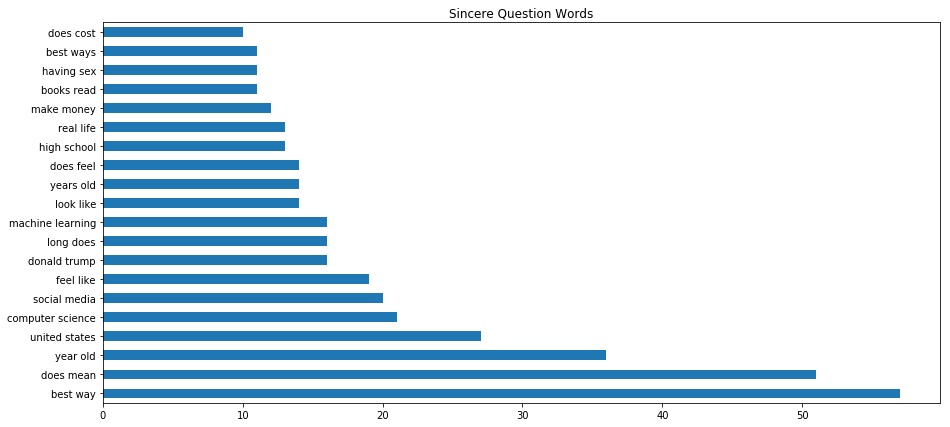

In [15]:
neg_class = df_text[df_text.index == 0].sum().copy()
neg_class.sort_values(0, ascending=False).head(20).plot(kind="barh", figsize=(15, 7), title="Sincere Question Words");

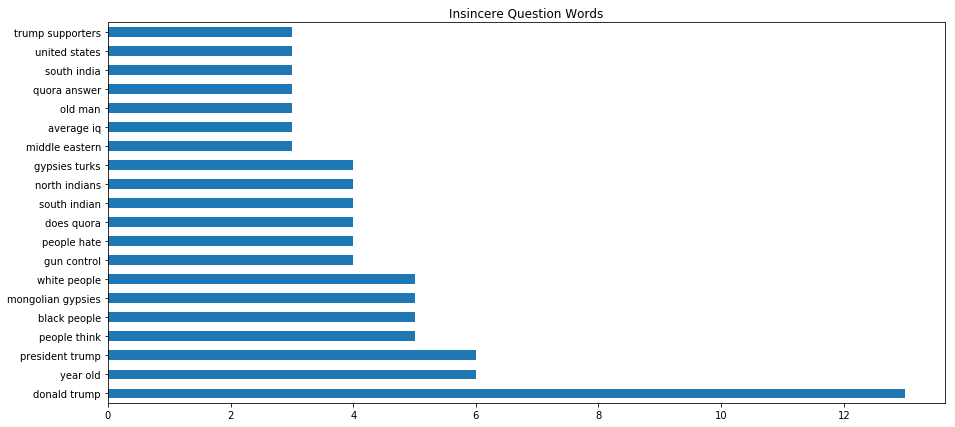

In [16]:
pos_class = df_text[df_text.index == 1].sum().copy()
pos_class.sort_values(0, ascending=False).head(20).plot(kind="barh", figsize=(15, 7), title="Insincere Question Words");

## 4. Initial Modeling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(df_text, df_text.index, train_size=.7, random_state=42)




/Users/EganBailey/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
model.score(X_train, y_train)

/Users/EganBailey/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9707142857142858

In [19]:
model.score(X_test, y_test)

0.9376666666666666

In [20]:
y_hat_test = model.predict(X_test)

In [21]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2812
           1       1.00      0.01      0.01       188

   micro avg       0.94      0.94      0.94      3000
   macro avg       0.97      0.50      0.49      3000
weighted avg       0.94      0.94      0.91      3000



In [22]:
confusion_matrix(y_test, y_hat_test)

array([[2812,    0],
       [ 187,    1]])

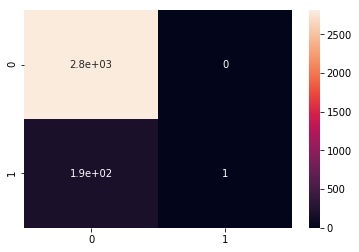

In [23]:
import seaborn as sns
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_hat_test)).round(3), annot=True)